<a href="https://colab.research.google.com/github/Jackline-Jebet/Msc-Financial-Engineering_Quant-Finance-Projects/blob/main/derivative-pricing/MScFE_620_DERIVATIVE_PRICING_Group_Work_Project_1_Group11980.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MScFE 620 DERIVATIVE PRICING**

**GROUP WORK PROJECT 1,**
**GROUP N0: 11980**

**TEAM MEMBERS**

1. Jackline Jebet,Kenya, jebet.jackline.r@gmail.com

2. Saheed Remi Kareem, Nigeria, kareemsaheed@gmail.com

3. Bruce Diale, South Africa, brucediale.k@gmail.com


**Q5 - Pricing ATM European Call & Put (Binomial Tree)**

In [1]:
# Q5 - Pricing ATM European Call & Put (Binomial Tree)

import numpy as np

def european_binomial_option(S0, K, r, sigma, T, N, option_type):
    dt = T/N
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    q = (np.exp(r*dt) - d) / (u - d)
    disc = np.exp(-r*dt)

    # Terminal stock prices
    prices = np.array([S0 * (u**j) * (d**(N-j)) for j in range(N+1)])

    # Terminal payoffs
    if option_type.lower() == "call":
        values = np.maximum(prices - K, 0)
    else:
        values = np.maximum(K - prices, 0)

    # Backward induction (no early exercise)
    for i in reversed(range(N)):
        values = disc * (q * values[1:] + (1-q) * values[:-1])

    return values[0]


# Parameters
S0, K, r, sigma, T, N = 100, 100, 0.05, 0.20, 0.25, 100

euro_call = european_binomial_option(S0, K, r, sigma, T, N, "call")
euro_put  = european_binomial_option(S0, K, r, sigma, T, N, "put")

print("European Call Price (N=100):", round(euro_call, 2))
print("European Put Price  (N=100):", round(euro_put, 2))

# Explanation for Q5(b):
print("\nComment:\nUsing N=100 steps gives high accuracy while remaining computationally efficient. "
      "The binomial tree converges to the Black-Scholes price as N increases, and around N=100 "
      "is standard for stable estimates.")



European Call Price (N=100): 4.61
European Put Price  (N=100): 3.36

Comment:
Using N=100 steps gives high accuracy while remaining computationally efficient. The binomial tree converges to the Black-Scholes price as N increases, and around N=100 is standard for stable estimates.


# Q6 - Computing Delta of European Call & Put

In [2]:
# Q6 - Computing Delta of European Call & Put
def european_delta(S0, K, r, sigma, T, N, option_type):
    dt = T/N
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u

    Su = S0 * u
    Sd = S0 * d

    Vu = european_binomial_option(Su, K, r, sigma, T - dt, N-1, option_type)
    Vd = european_binomial_option(Sd, K, r, sigma, T - dt, N-1, option_type)

    delta = (Vu - Vd) / (Su - Sd)
    return delta

call_delta = european_delta(S0, K, r, sigma, T, N, "call")
put_delta  = european_delta(S0, K, r, sigma, T, N, "put")

print("European Call Delta (N=100):", round(call_delta, 2))
print("European Put Delta  (N=100):", round(put_delta, 2))

# Interpretation for Q6(b)
print("\nComment:\nThe call delta is positive: call value increases with stock price. "
      "The put delta is negative: put value decreases when stock price rises. "
      "Delta measures sensitivity of the option price to small stock movements.")


European Call Delta (N=100): 0.57
European Put Delta  (N=100): -0.43

Comment:
The call delta is positive: call value increases with stock price. The put delta is negative: put value decreases when stock price rises. Delta measures sensitivity of the option price to small stock movements.


# Q7 - Sensitivity to Volatility (Vega Approximation)

In [3]:
# Q7 - Sensitivity to Volatility (Vega Approximation)

sigma_new = 0.25  # +5% vol jump

call_new = european_binomial_option(S0, K, r, sigma_new, T, N, "call")
put_new  = european_binomial_option(S0, K, r, sigma_new, T, N, "put")

print("European Call (20% vol):", round(euro_call, 2))
print("European Call (25% vol):", round(call_new, 2))
print("Call ΔVol:", round(call_new - euro_call, 2))

print("\nEuropean Put (20% vol):", round(euro_put, 2))
print("European Put (25% vol):", round(put_new, 2))
print("Put ΔVol:", round(put_new - euro_put, 2))

print("\nComment:\nBoth call and put prices increase with volatility. "
      "This is because higher volatility increases uncertainty, raising the value "
      "of optionality for both long calls and long puts. "
      "Puts tend to react more strongly when ATM or ITM because downside probability increases.")


European Call (20% vol): 4.61
European Call (25% vol): 5.59
Call ΔVol: 0.98

European Put (20% vol): 3.36
European Put (25% vol): 4.34
Put ΔVol: 0.98

Comment:
Both call and put prices increase with volatility. This is because higher volatility increases uncertainty, raising the value of optionality for both long calls and long puts. Puts tend to react more strongly when ATM or ITM because downside probability increases.


# Q8 - Pricing American Call & Put using a Binomial Tree

In [4]:
# Q8 - Pricing American Call & Put using a Binomial Tree
import numpy as np

def american_binomial_option(S0, K, r, sigma, T, N, option_type):
    dt = T/N
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    q = (np.exp(r*dt) - d) / (u - d)

    # Terminal stock prices
    prices = np.array([S0 * (u**j) * (d**(N-j)) for j in range(N+1)])

    # Terminal payoffs
    if option_type.lower() == "call":
        values = np.maximum(prices - K, 0)
    else:
        values = np.maximum(K - prices, 0)

    disc = np.exp(-r*dt)

    # Backward induction with early exercise
    for i in reversed(range(N)):
        prices = prices[1:] * d
        continuation = disc * (q * values[1:] + (1-q) * values[:-1])

        if option_type.lower() == "call":
            exercise = np.maximum(prices - K, 0)
        else:
            exercise = np.maximum(K - prices, 0)

        values = np.maximum(exercise, continuation)

    return values[0]


# Parameters
S0, K, r, sigma, T, N = 100, 100, 0.05, 0.20, 0.25, 100

american_call = american_binomial_option(S0, K, r, sigma, T, N, "call")
american_put  = american_binomial_option(S0, K, r, sigma, T, N, "put")

print("American Call Price (N=100):", round(american_call, 2))
print("American Put Price  (N=100):", round(american_put, 2))



American Call Price (N=100): 4.61
American Put Price  (N=100): 3.47


# Q9 - Computing Delta for American Call & Put

In [5]:
# Q9 — Computing Delta for American Call & Put

def american_delta(S0, K, r, sigma, T, N, option_type):
    dt = T/N
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u

    Su = S0 * u
    Sd = S0 * d

    # Reprice with 1 fewer step (remaining time T - dt)
    Vu = american_binomial_option(Su, K, r, sigma, T - dt, N-1, option_type)
    Vd = american_binomial_option(Sd, K, r, sigma, T - dt, N-1, option_type)

    delta = (Vu - Vd) / (Su - Sd)
    return delta

call_delta = american_delta(S0, K, r, sigma, T, N, "call")
put_delta  = american_delta(S0, K, r, sigma, T, N, "put")

print("American Call Delta (N=100):", round(call_delta, 2))
print("American Put Delta  (N=100):", round(put_delta, 2))



American Call Delta (N=100): 0.57
American Put Delta  (N=100): -0.45


# Q10 - Sensitivity to Volatility (Vega Approximation)

In [6]:
# Q10 - Sensitivity to Volatility (Vega Approximation)

sigma_new = 0.25  # +5% bump

call_new = american_binomial_option(S0, K, r, sigma_new, T, N, "call")
put_new  = american_binomial_option(S0, K, r, sigma_new, T, N, "put")

print("American Call (20% vol):", round(american_call, 2))
print("American Call (25% vol):", round(call_new, 2))
print("Call ΔVol:", round(call_new - american_call, 2))

print("American Put (20% vol): ", round(american_put, 2))
print("American Put (25% vol): ", round(put_new, 2))
print("Put ΔVol:", round(put_new - american_put, 2))



American Call (20% vol): 4.61
American Call (25% vol): 5.59
Call ΔVol: 0.98
American Put (20% vol):  3.47
American Put (25% vol):  4.45
Put ΔVol: 0.98


# Q11 - Q14 Graphs, Checks and Tables


Price table (European binomial vs American trinomial):

  K  Call_Euro  Put_Euro  Call_Amer  Put_Amer  C_euro_minus_P_euro  S0_minus_Ke_rt  C_amer_minus_P_amer  S0_minus_K
 90      11.67      0.55      11.67      0.56                11.12           11.12                11.11       10.00
 95       7.72      1.54       7.71      1.57                 6.18            6.18                 6.14        5.00
100       4.61      3.36       4.61      3.47                 1.24            1.24                 1.13        0.00
105       2.49      6.18       2.48      6.42                -3.70           -3.70                -3.94       -5.00
110       1.19      9.83       1.19     10.33                -8.63           -8.63                -9.13      -10.00


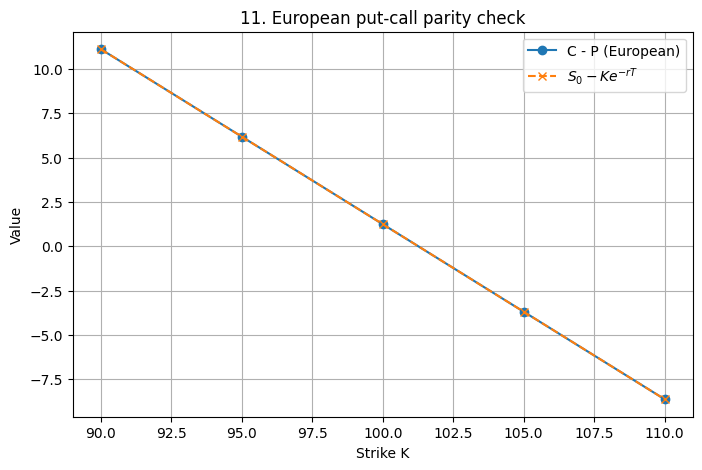


11. European parity differences:
  K  C_euro_minus_P_euro  S0_minus_Ke_rt  ParityDiff_Euro
 90                11.12           11.12            -0.00
 95                 6.18            6.18            -0.00
100                 1.24            1.24            -0.00
105                -3.70           -3.70            -0.00
110                -8.63           -8.63            -0.00


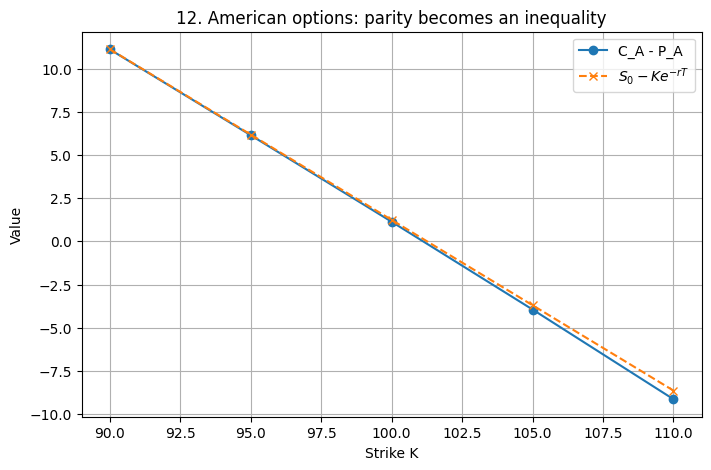


12. American parity deviation from discounted bound:
  K  C_amer_minus_P_amer  S0_minus_Ke_rt  ParityDiff_Amer
 90                11.11           11.12            -0.01
 95                 6.14            6.18            -0.04
100                 1.13            1.24            -0.11
105                -3.94           -3.70            -0.25
110                -9.13           -8.63            -0.50


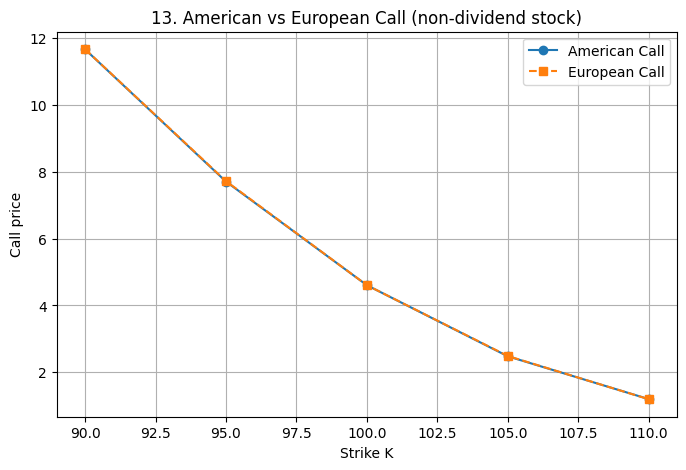


13. Early-exercise premium on calls (should be ≈0):
  K  Call_Amer  Call_Euro  CallDiff_Amer_minus_Euro
 90      11.67      11.67                     -0.00
 95       7.71       7.72                     -0.01
100       4.61       4.61                     -0.00
105       2.48       2.49                     -0.01
110       1.19       1.19                      0.00


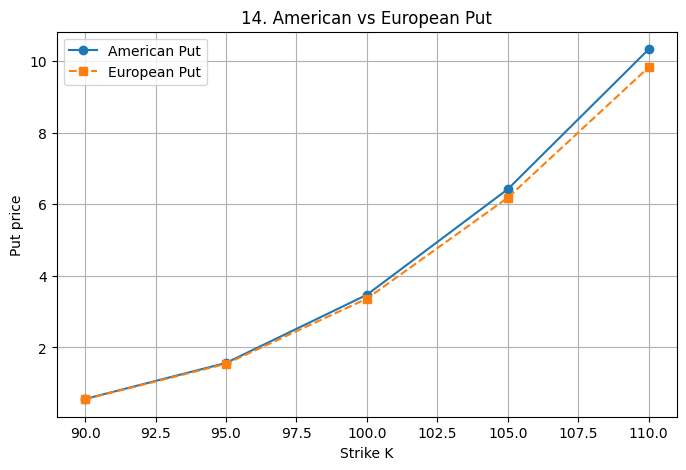


14. Early-exercise premium on puts:
  K  Put_Amer  Put_Euro  PutDiff_Amer_minus_Euro
 90      0.56      0.55                     0.01
 95      1.57      1.54                     0.03
100      3.47      3.36                     0.11
105      6.42      6.18                     0.24
110     10.33      9.83                     0.50


In [7]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Pricing models


def european_crr_call_put(S0, K, r, sigma, T, N, option_type):
    """European option via Cox-Ross-Rubinstein binomial tree"""
    dt = T / N
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u
    q = (math.exp(r * dt) - d) / (u - d)

    # Terminal stock prices (j = number of up moves)
    terminal_nodes = N + 1
    ST = np.zeros(terminal_nodes)
    for j in range(terminal_nodes):
        ST[j] = S0 * (u ** j) * (d ** (N - j))

    # Payoffs at maturity
    if option_type == "call":
        payoff = np.maximum(ST - K, 0)
    else:
        payoff = np.maximum(K - ST, 0)

    # Backward induction
    for _ in range(N):
        payoff = math.exp(-r * dt) * (q * payoff[1:] + (1 - q) * payoff[:-1])

    return float(payoff[0])


def european_trinomial_option(S0, K, r, sigma, T, N, option_type):
    """European trinomial tree (kept very close to your version)"""
    dt = T / N
    u = math.exp(sigma * math.sqrt(3 * dt))
    d = 1 / u
    drift = r - 0.5 * sigma**2

    pu = 1/6 + (drift * math.sqrt(dt)) / (2 * math.sqrt(3) * sigma)
    pm = 2/3
    pd = 1/6 - (drift * math.sqrt(dt)) / (2 * math.sqrt(3) * sigma)

    # Ensure probabilities stay in [0,1]; fallback to pure risk-neutral if needed
    if pu < 0 or pd < 0 or pu > 1 or pd > 1:
        pu = 1/6
        pd = 1/6
        pm = 2/3

    discount = math.exp(-r * dt)
    # Terminal stock prices: from u^{-N} to u^{+N}
    levels = np.arange(-N, N+1)
    ST = S0 * (u ** levels)

    payoff = np.maximum(ST - K, 0) if option_type == "call" else np.maximum(K - ST, 0)
    payoff = list(payoff)

    for step in range(N-1, -1, -1):
        new_level = []
        offset = step + 1
        for k in range(-step, step + 1):
            idx = k + offset
            val = discount * (pu * payoff[idx + 1] + pm * payoff[idx] + pd * payoff[idx - 1])
            new_level.append(val)
        payoff = new_level

    return float(payoff[0])


def american_trinomial_option(S0, K, r, sigma, T, N, option_type):
    """American trinomial tree with early-exercise check"""
    dt = T / N
    u = math.exp(sigma * math.sqrt(3 * dt))
    d = 1 / u
    drift = r - 0.5 * sigma**2

    pu = 1/6 + (drift * math.sqrt(dt)) / (2 * math.sqrt(3) * sigma)
    pm = 2/3
    pd = 1/6 - (drift * math.sqrt(dt)) / (2 * math.sqrt(3) * sigma)

    if pu < 0 or pd < 0 or pu > 1 or pd > 1:
        pu = pd = 1/6
        pm = 2/3

    discount = math.exp(-r * dt)
    levels = np.arange(-N, N+1)
    ST = S0 * (u ** levels)

    values = np.maximum(ST - K, 0) if option_type == "call" else np.maximum(K - ST, 0)
    values = list(values)

    for step in range(N-1, -1, -1):
        new_level = []
        offset = step + 1
        for k in range(-step, step + 1):
            idx = k + offset
            continuation = discount * (pu * values[idx + 1] + pm * values[idx] + pd * values[idx - 1])
            S_node = S0 * (u ** k)
            intrinsic = max(S_node - K, 0) if option_type == "call" else max(K - S_node, 0)
            new_level.append(max(continuation, intrinsic))
        values = new_level

    return float(values[0])


# Parameters


S0 = 100.0
r = 0.05
sigma = 0.20
T = 0.25
N = 100
K_list = [90, 95, 100, 105, 110]


# Calculations & table


records = []
for K in K_list:
    C_euro = european_crr_call_put(S0, K, r, sigma, T, N, "call")
    P_euro = european_crr_call_put(S0, K, r, sigma, T, N, "put")
    C_amer = american_trinomial_option(S0, K, r, sigma, T, N, "call")
    P_amer = american_trinomial_option(S0, K, r, sigma, T, N, "put")

    records.append({
        "K": K,
        "Call_Euro": C_euro,
        "Put_Euro": P_euro,
        "Call_Amer": C_amer,
        "Put_Amer": P_amer,
        "C_euro_minus_P_euro": C_euro - P_euro,
        "S0_minus_Ke_rt": S0 - K * math.exp(-r*T),
        "C_amer_minus_P_amer": C_amer - P_amer,
        "S0_minus_K": S0 - K
    })

df = pd.DataFrame(records)
pd.set_option('display.float_format', '{:.2f}'.format)

print("\nPrice table (European binomial vs American trinomial):\n")
print(df.to_string(index=False))



# 11. European parity
plt.figure(figsize=(8,5))
plt.plot(df["K"], df["C_euro_minus_P_euro"], 'o-', label="C - P (European)")
plt.plot(df["K"], df["S0_minus_Ke_rt"], 'x--', label=r"$S_0 - K e^{-rT}$")
plt.title("11. European put-call parity check")
plt.xlabel("Strike K")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

print("\n11. European parity differences:")
df["ParityDiff_Euro"] = df["C_euro_minus_P_euro"] - df["S0_minus_Ke_rt"]
print(df[["K", "C_euro_minus_P_euro", "S0_minus_Ke_rt", "ParityDiff_Euro"]].to_string(index=False))


# 12. American parity (inequality)
plt.figure(figsize=(8,5))
plt.plot(df["K"], df["C_amer_minus_P_amer"], 'o-', label="C_A - P_A")
plt.plot(df["K"], df["S0_minus_Ke_rt"], 'x--', label=r"$S_0 - K e^{-rT}$")
plt.title("12. American options: parity becomes an inequality")
plt.xlabel("Strike K")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

df["ParityDiff_Amer"] = df["C_amer_minus_P_amer"] - df["S0_minus_Ke_rt"]
print("\n12. American parity deviation from discounted bound:")
print(df[["K", "C_amer_minus_P_amer", "S0_minus_Ke_rt", "ParityDiff_Amer"]].to_string(index=False))


# 13. Call comparison
plt.figure(figsize=(8,5))
plt.plot(df["K"], df["Call_Amer"], 'o-', label="American Call")
plt.plot(df["K"], df["Call_Euro"], 's--', label="European Call")
plt.title("13. American vs European Call (non-dividend stock)")
plt.xlabel("Strike K")
plt.ylabel("Call price")
plt.legend()
plt.grid(True)
plt.show()

df["CallDiff_Amer_minus_Euro"] = df["Call_Amer"] - df["Call_Euro"]
print("\n13. Early-exercise premium on calls (should be ≈0):")
print(df[["K", "Call_Amer", "Call_Euro", "CallDiff_Amer_minus_Euro"]].to_string(index=False))


# 14. Put comparison
plt.figure(figsize=(8,5))
plt.plot(df["K"], df["Put_Amer"], 'o-', label="American Put")
plt.plot(df["K"], df["Put_Euro"], 's--', label="European Put")
plt.title("14. American vs European Put")
plt.xlabel("Strike K")
plt.ylabel("Put price")
plt.legend()
plt.grid(True)
plt.show()

df["PutDiff_Amer_minus_Euro"] = df["Put_Amer"] - df["Put_Euro"]
print("\n14. Early-exercise premium on puts:")
print(df[["K", "Put_Amer", "Put_Euro", "PutDiff_Amer_minus_Euro"]].to_string(index=False))



# Q15 & Q16 Pricing European options using a trinomial tree:

In [8]:
import math, numpy as np

#  European Trinomial Model

def european_trinomial_option(S0, K, r, sigma, T, N, option_type):
    dt = T / N
    u = math.exp(sigma * math.sqrt(3*dt))
    d = 1/u
    mu = r - 0.5*sigma*sigma

    pu = 1/6 + (mu*math.sqrt(dt))/(2*math.sqrt(3)*sigma)
    pm = 2/3
    pd = 1/6 - (mu*math.sqrt(dt))/(2*math.sqrt(3)*sigma)

    # probability adjustment if needed
    if not (0 <= pu <= 1 and 0 <= pm <= 1 and 0 <= pd <= 1):
        mu_rn = r - 0.5*sigma*sigma
        pu = 1/6 + (mu_rn*math.sqrt(dt))/(2*math.sqrt(3)*sigma)
        pd = 1/6 - (mu_rn*math.sqrt(dt))/(2*math.sqrt(3)*sigma)
        pm = 1 - pu - pd

    # terminal stock prices
    ST = [S0 * (u**k) for k in range(-N, N+1)]

    # terminal payoffs
    if option_type == "call":
        values = [max(s - K, 0) for s in ST]
    else:
        values = [max(K - s, 0) for s in ST]

    # backward induction
    for i in range(N-1, -1, -1):
        new_vals = []
        for k in range(-i, i+1):
            idx = k + (i+1)
            cont_val = math.exp(-r*dt)*(
                pu * values[idx + 1] +
                pm * values[idx] +
                pd * values[idx - 1]
            )
            new_vals.append(cont_val)
        values = new_vals

    return values[0]

# Parameters & Strikes
S0 = 100
r = 0.05
sigma = 0.20
T = 0.25
N = 100
K_list = [90, 95, 100, 105, 110]


# Q15: European CALL Prices

print("European Call Prices (N=100):")
for K in K_list:
    price = european_trinomial_option(S0, K, r, sigma, T, N, "call")
    print(f"K={K}:  {round(price,4)}")

print("\n")


# Q16: European PUT Prices

print("European Put Prices (N=100):")
for K in K_list:
    price = european_trinomial_option(S0, K, r, sigma, T, N, "put")
    print(f"K={K}:  {round(price,4)}")


European Call Prices (N=100):
K=90:  11.6673
K=95:  7.7082
K=100:  4.605
K=105:  2.4769
K=110:  1.1947


European Put Prices (N=100):
K=90:  0.5494
K=95:  1.5281
K=100:  3.3628
K=105:  6.1726
K=110:  9.8283


# Q17 & Q18 (American Trinomial)

In [9]:

import math, numpy as np

#  American Trinomial Option Model

def american_trinomial_option(S0, K, r, sigma, T, N, option_type):
    dt = T / N
    u = math.exp(sigma * math.sqrt(3*dt))
    d = 1/u
    mu = r - 0.5*sigma*sigma

    pu = 1/6 + (mu*math.sqrt(dt))/(2*math.sqrt(3)*sigma)
    pm = 2/3
    pd = 1/6 - (mu*math.sqrt(dt))/(2*math.sqrt(3)*sigma)

    # probability adjustment if needed
    if not (0 <= pu <= 1 and 0 <= pm <= 1 and 0 <= pd <= 1):
        mu_rn = r - 0.5*sigma*sigma
        pu = 1/6 + (mu_rn*math.sqrt(dt))/(2*math.sqrt(3)*sigma)
        pd = 1/6 - (mu_rn*math.sqrt(dt))/(2*math.sqrt(3)*sigma)
        pm = 1 - pu - pd

    # terminal stock prices
    ST = [S0 * (u**k) for k in range(-N, N+1)]

    # terminal payoffs
    if option_type == "call":
        values = [max(s - K, 0) for s in ST]
    else:
        values = [max(K - s, 0) for s in ST]

    # backward induction (with early exercise)
    for i in range(N-1, -1, -1):
        new_vals = []
        for k in range(-i, i+1):
            idx = k + (i+1)

            # continuation value
            cont = math.exp(-r*dt)*(
                pu*values[idx+1] + pm*values[idx] + pd*values[idx-1]
            )

            # intrinsic value for early exercise
            St = S0 * (u**k)
            intrinsic = (St - K) if option_type=="call" else (K - St)

            new_vals.append(max(cont, intrinsic))  # American max()
        values = new_vals

    return values[0]



# Parameters & Strikes

S0 = 100
r = 0.05
sigma = 0.20
T = 0.25
N = 100
K_list = [90, 95, 100, 105, 110]



# Q17: American CALL Prices

print("American Call Prices (N=100):")
for K in K_list:
    price = american_trinomial_option(S0, K, r, sigma, T, N, "call")
    print(f"K={K}:  {round(price,4)}")

print("\n")


# Q18: American PUT Prices

print("American Put Prices (N=100):")
for K in K_list:
    price = american_trinomial_option(S0, K, r, sigma, T, N, "put")
    print(f"K={K}:  {round(price,4)}")


American Call Prices (N=100):
K=90:  11.6673
K=95:  7.7082
K=100:  4.605
K=105:  2.4769
K=110:  1.1947


American Put Prices (N=100):
K=90:  0.5599
K=95:  1.5665
K=100:  3.4704
K=105:  6.4198
K=110:  10.3282


# **Setup & Functions For Q19 - Q24**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp
from scipy.stats import norm

# Parameters and price tables (from your draft)
S0 = 100.0
r = 0.05
T = 0.25
sigma = 0.20
N = 100
K = 100
strikes = [90,95,100,105,110]
eu_calls = [11.67,7.71,4.61,2.48,1.19]
eu_puts  = [0.55,1.53,3.36,6.17,9.83]
am_calls = [11.67,7.71,4.61,2.48,1.19]
am_puts  = [0.56,1.57,3.47,6.41,10.33]

# **Q19 - European Call & Put vs Stock Price**

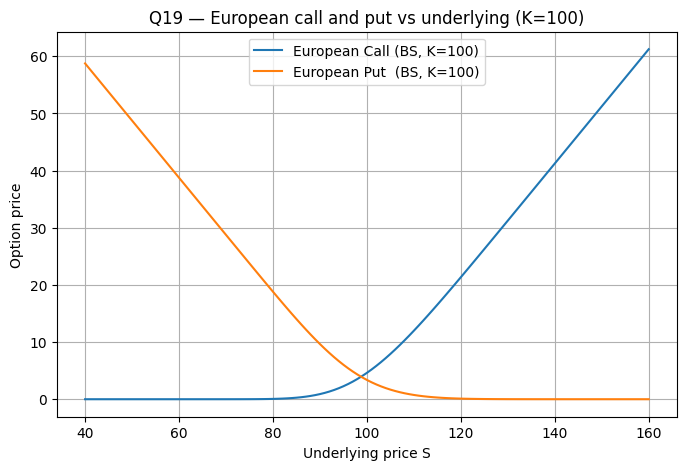

In [11]:
#19- European C and P vs S (Black-Scholes for K=100)
def bs_call_put(S,K,r,sigma,T):
    if T<=0:
        return max(S-K,0), max(K-S,0)
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    c = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    p = K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)
    return c,p

sigma = 0.20  # as in draft for the European plots
S_grid = np.linspace(40,160,121)
euC = []; euP = []
for S in S_grid:
    c,p = bs_call_put(S,100,r,sigma,T)
    euC.append(c); euP.append(p)

plt.figure(figsize=(8,5))
plt.plot(S_grid, euC, label='European Call (BS, K=100)')
plt.plot(S_grid, euP, label='European Put  (BS, K=100)')
plt.xlabel('Underlying price S'); plt.ylabel('Option price')
plt.title('Q19 — European call and put vs underlying (K=100)')
plt.legend(); plt.grid(True)
plt.show()

# **Q20 — American Call & Put vs Stock Price**

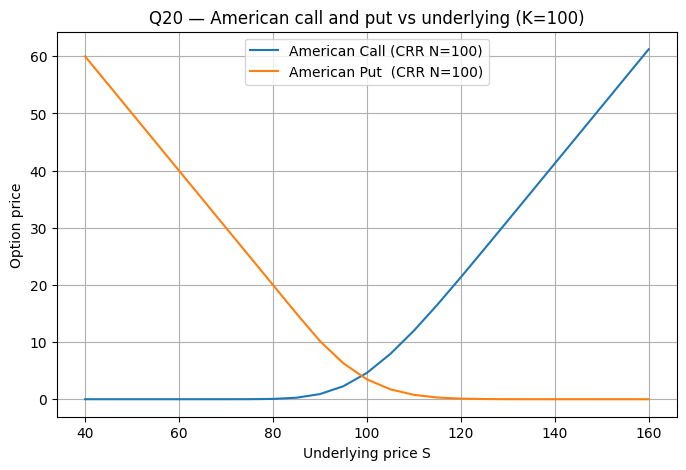

In [12]:
# --- Q20: American call & put vs S using CRR N=100 ---
def american_binomial_price(S0,K,r,sigma,T,N,option_type='put'):
    dt = T/N
    u = np.exp(sigma*np.sqrt(dt))
    d = 1.0/u
    disc = np.exp(-r*dt)
    p = (np.exp(r*dt)-d)/(u-d)
    ST = np.array([S0*(u**j)*(d**(N-j)) for j in range(N+1)])
    if option_type=='call':
        V = np.maximum(ST-K,0.0)
    else:
        V = np.maximum(K-ST,0.0)
    for i in range(N-1,-1,-1):
        ST = ST[1:]*d
        cont = disc*(p*V[1:]+(1-p)*V[:-1])
        if option_type=='call':
            exercise = np.maximum(ST-K,0.0)
        else:
            exercise = np.maximum(K-ST,0.0)
        V = np.maximum(cont, exercise)
    return float(V[0])

S_grid_small = np.linspace(40,160,25)
am_calls_vsS = [american_binomial_price(S,100,r,sigma,T,100,'call') for S in S_grid_small]
am_puts_vsS  = [american_binomial_price(S,100,r,sigma,T,100,'put') for S in S_grid_small]

plt.figure(figsize=(8,5))
plt.plot(S_grid_small, am_calls_vsS, label='American Call (CRR N=100)')
plt.plot(S_grid_small, am_puts_vsS, label='American Put  (CRR N=100)')
plt.xlabel('Underlying price S'); plt.ylabel('Option price')
plt.title('Q20 — American call and put vs underlying (K=100)')
plt.legend(); plt.grid(True)
plt.show()

# **Q21 — Call Prices (European vs American) vs Strike**

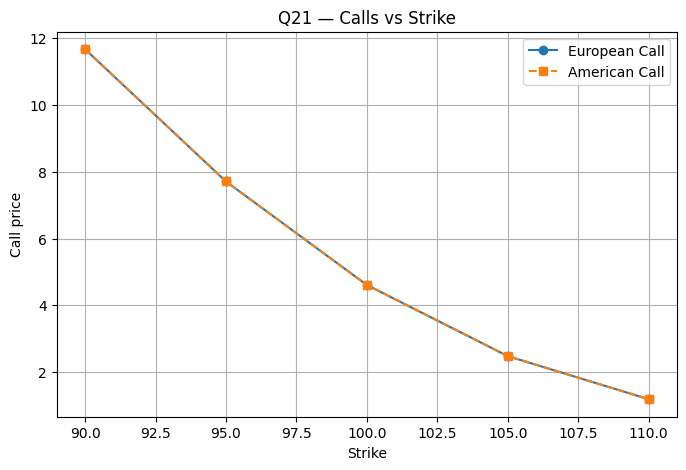

In [13]:
# Calls and Puts vs Strike (using the price tables)
df_calls = pd.DataFrame({'Strike':strikes,'Call_Euro':eu_calls,'Call_Amer':am_calls})
df_puts  = pd.DataFrame({'Strike':strikes,'Put_Euro':eu_puts,'Put_Amer':am_puts})

plt.figure(figsize=(8,5))
plt.plot(df_calls['Strike'], df_calls['Call_Euro'],'o-', label='European Call')
plt.plot(df_calls['Strike'], df_calls['Call_Amer'],'s--', label='American Call')
plt.xlabel('Strike'); plt.ylabel('Call price'); plt.title('Q21 — Calls vs Strike'); plt.grid(True); plt.legend()
plt.show()


# **Q22 — Put Prices (European vs American) vs Strike**

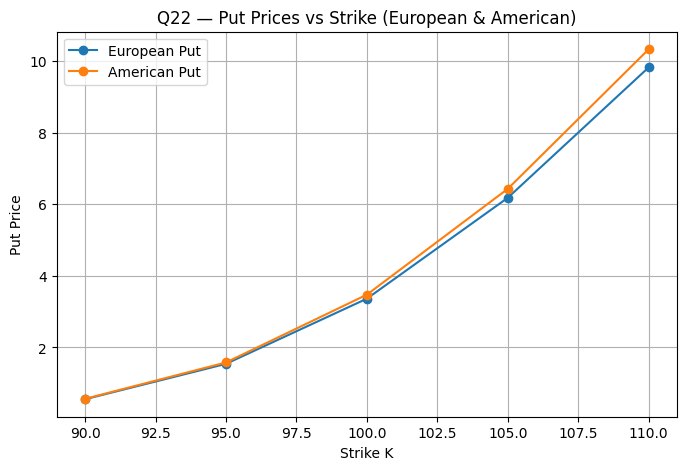

,Strike K,European Put,American Put
0,90,0.55,0.56
1,95,1.54,1.58
2,100,3.36,3.47
3,105,6.18,6.43
4,110,9.83,10.33


In [14]:
PE = [european_binomial_option(S0, KX, r, sigma, T, N, "put") for KX in strikes]
PA = [american_binomial_option(S0, KX, r, sigma, T, N, "put") for KX in strikes]

plt.figure(figsize=(8,5))
plt.plot(strikes, PE, marker='o', label="European Put")
plt.plot(strikes, PA, marker='o', label="American Put")
plt.title("Q22 — Put Prices vs Strike (European & American)")
plt.xlabel("Strike K")
plt.ylabel("Put Price")
plt.grid(True)
plt.legend()
plt.show()

df_put_K = pd.DataFrame({
    "Strike K": strikes,
    "European Put": PE,
    "American Put": PA
})
df_put_K



# **Q23 - European Put–Call Parity Verification Table**

In [15]:
import math
import numpy as np
import pandas as pd

# CRR European option pricing (binomial)
def european_binomial_option(S0, K, r, sigma, T, N, option_type):
    dt = T / N
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u
    q = (math.exp(r*dt) - d) / (u - d)

    # terminal prices
    ST = np.array([S0 * (u**j) * (d**(N-j)) for j in range(N+1)])

    # terminal payoffs
    if option_type == "call":
        values = np.maximum(ST - K, 0)
    else:
        values = np.maximum(K - ST, 0)

    # backward induction
    for i in range(N):
        values = math.exp(-r*dt) * (q * values[1:] + (1-q) * values[:-1])

    return float(values[0])

# Parameters
S0 = 100
r = 0.05
sigma = 0.20
T = 0.25
N = 100
K_list = [90, 95, 100, 105, 110]

# Build output table
rows = []
for K in K_list:
    C = european_binomial_option(S0, K, r, sigma, T, N, "call")
    P = european_binomial_option(S0, K, r, sigma, T, N, "put")

    lhs = C - P
    rhs = S0 - K * math.exp(-r*T)
    diff = lhs - rhs

    rows.append({
        'K': K,
        'Call': round(C, 2),
        'Put': round(P, 2),
        'C_minus_P': round(lhs, 2),
        'S0_minus_Ke_rT': round(rhs, 2),
        'Difference': round(diff, 6),
        'Parity_Holds': "Yes" if abs(diff) < 1e-3 else "No"
    })

df_parity = pd.DataFrame(rows)
print(df_parity.to_string(index=False))


  K  Call  Put  C_minus_P  S0_minus_Ke_rT  Difference Parity_Holds
 90 11.67 0.55      11.12           11.12       -0.00          Yes
 95  7.72 1.54       6.18            6.18       -0.00          Yes
100  4.61 3.36       1.24            1.24       -0.00          Yes
105  2.49 6.18      -3.70           -3.70       -0.00          Yes
110  1.19 9.83      -8.63           -8.63       -0.00          Yes


# **Q24 - European Put–Call Parity Check**

In [16]:
# --- Q24: American parity residuals (table) ---
rows = []
for K in K_list:
    C_A = american_trinomial_option(S0, K, r, sigma, T, N, "call")
    P_A = american_trinomial_option(S0, K, r, sigma, T, N, "put")

    lhs = C_A - P_A
    lower = S0 - K
    upper = S0 - K * math.exp(-r*T)

    rows.append({
        "K": K,
        "Call_Amer": round(C_A, 2),
        "Put_Amer": round(P_A, 2),
        "C_A - P_A": round(lhs, 2),
        "Lower (S0-K)": round(lower, 4),
        "Upper (S0-Ke^{-rT})": round(upper, 2),
        "Inequality holds?": lower <= lhs <= upper
    })

import pandas as pd
df24 = pd.DataFrame(rows)
print(df24.to_string(index=False))



  K  Call_Amer  Put_Amer  C_A - P_A  Lower (S0-K)  Upper (S0-Ke^{-rT})  Inequality holds?
 90      11.67      0.56      11.11            10                11.12               True
 95       7.71      1.57       6.14             5                 6.18               True
100       4.61      3.47       1.13             0                 1.24               True
105       2.48      6.42      -3.94            -5                -3.70               True
110       1.19     10.33      -9.13           -10                -8.63               True



# Q25(a) & (b) - European Put - 3-step binomial + Delta Hedging


In [17]:
import numpy as np

# Parameters
S0, K, T, r, sigma = 180, 182, 0.5, 0.02, 0.25
N = 3
dt = T / N
u = np.exp(sigma * np.sqrt(dt))
d = 1/u
p = (np.exp(r*dt) - d)/(u - d)
disc = np.exp(-r*dt)

# Lattices
S = np.zeros((N+1, N+1))
put = np.zeros((N+1, N+1))
delta = np.zeros((N, N))

# Stock tree
for t in range(N+1):
    for j in range(t+1):
        S[j,t] = S0 * (u**j) * (d**(t-j))

# Terminal payoff
put[:,N] = np.maximum(K - S[:,N], 0)

# Backward (European)
for t in range(N-1, -1, -1):
    for j in range(t+1):
        put[j,t] = disc*(p*put[j+1,t+1] + (1-p)*put[j,t+1])
        delta[j,t] = (put[j+1,t+1] - put[j,t+1]) / (S[j+1,t+1] - S[j,t+1])

# Premium
price = put[0,0]
print(f"European Put Price (3-step): ${price:.4f}\n")

# Path: Up → Down → Up
path_nodes = [0, 1, 0, 1]

cash = price
shares = 0

print("Step | S     | Put V  | Delta   | Trade  | Cash")
print("--------------------------------------------------------")

# t = 0 hedge
Δ = delta[0,0]
trade = -Δ - shares
cash -= trade * S0
shares = -Δ

print(f" 0   | {S[0,0]:6.2f} | {put[0,0]:6.2f} | {Δ:7.2f} | {trade:7.2f} | {cash:7.2f}")

# t = 1, 2, 3
for t in range(1, N+1):
    node = path_nodes[t]

    # interest accrual
    cash *= np.exp(r*dt)

    # delta at time t-1, node j
    Δ = delta[node, t-1] if t < N else ( -1 if put[node,t] > 0 else 0 )

    trade = -Δ - shares
    cash -= trade * S[node,t]
    shares = -Δ

    print(f" {t}   | {S[node,t]:6.2f} | {put[node,t]:6.2f} | {Δ:7.2f} | {trade:7.2f} | {cash:7.2f}")

# Final payoff
final_S = S[path_nodes[N], N]
payoff = max(K - final_S, 0)
cash += -shares * final_S
cash -= payoff

print("\nFinal payoff to buyer:", payoff)
print("Final cash in hedge portfolio:", round(cash,2))


European Put Price (3-step): $13.8224

Step | S     | Put V  | Delta   | Trade  | Cash
--------------------------------------------------------
 0   | 180.00 |  13.82 |   -0.47 |    0.47 |  -71.24
 1   | 199.34 |   5.01 |    0.00 |   -0.47 |   22.72
 2   | 146.77 |  34.63 |   -0.74 |    0.74 |  -86.50
 3   | 162.54 |  19.46 |   -1.00 |    0.26 | -128.28

Final payoff to buyer: 19.46476999964628
Final cash in hedge portfolio: -310.28


# Q26: American Put Option Pricing + Perfect Delta Hedging (All-Down Path)

In [18]:
# =============================================================================
# Q26: American Put Option Pricing + Perfect Delta Hedging (All-Down Path)
# Parameters: S0=180, K=182, T=0.5, r=0.02, sigma=0.25, N=25 steps
# =============================================================================

import numpy as np
import math

def q26_american_put_perfect_hedge():
    # Parameters
    S0, K, T, r, sigma = 180.0, 182.0, 0.5, 0.02, 0.25
    N = 25
    dt = T / N
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u
    p = (math.exp(r * dt) - d) / (u - d)   # Risk-neutral probability
    disc = math.exp(-r * dt)

    # Initialize arrays
    stock = np.zeros((N+1, N+1))
    put   = np.zeros((N+1, N+1))
    delta = np.zeros((N, N))  # delta[t, node]

    # Build stock price tree
    for t in range(N+1):
        for j in range(t+1):
            stock[j, t] = S0 * (u ** (t - j)) * (d ** j)

    # Terminal payoff (at maturity)
    put[:, N] = np.maximum(K - stock[:, N], 0)

    # Backward induction with early exercise check
    for t in range(N-1, -1, -1):
        for j in range(t+1):
            continuation = disc * (p * put[j, t+1] + (1-p) * put[j+1, t+1])
            exercise = K - stock[j, t]
            put[j, t] = max(continuation, exercise)

            # Delta = (V_up - V_down) / (S_up - S_down)
            delta[j, t] = (put[j, t+1] - put[j+1, t+1]) / (stock[j, t+1] - stock[j+1, t+1])

    american_put_price = round(put[0, 0], 2)
    print(f"American Put Price (25-step binomial): ${american_put_price}\n")

    # =================================================================
    # Delta Hedging Simulation: Seller of the Put (All-Down Path)
    # =================================================================
    cash = american_put_price        # Receive premium at t=0
    shares_held = 0.0
    path_data = []

    print("All-Down Path Delta Hedging (Put Seller)")
    print("-" * 90)
    print(f"{'Step':>4} {'S(t)':>10} {'Put Value':>12} {'Delta':>10} {'Trade':>10} {'Cash (after int+trade)':>22}")
    print("-" * 90)

    for step in range(N+1):
        node = step                    # All-down path: always go to lower node
        S = stock[node, step]
        V = put[node, step]

        # Delta at current node (0 at maturity)
        if step < N:
            current_delta = delta[node, step]
        else:
            current_delta = 0.0

        # 1. Earn interest on cash from previous period (skip at t=0)
        if step > 0:
            cash *= math.exp(r * dt)

        # 2. Rebalance: buy/sell shares to match new delta
        trade = current_delta - shares_held
        cash -= trade * S                     # Pay (if trade > 0) or receive cash

        # Update position
        shares_held = current_delta

        # Record
        path_data.append({
            'step': step, 'S': S, 'V': V, 'delta': current_delta,
            'trade': trade, 'cash': cash, 'shares': shares_held
        })

        # Print selected steps
        if step in [0, 1, 2, 10, 20, 24, 25]:
            print(f"{step:4} {S:10.2f} {V:12.2f} {current_delta:10.2f} {trade:+10.2f} {cash:22.2f}")

    # Final settlement at maturity
    final_S = stock[N, N]
    payoff_to_buyer = max(K - final_S, 0)

    # Close delta position
    cash += -shares_held * final_S
    # Pay the option payoff to the buyer
    cash -= payoff_to_buyer

    print("-" * 90)
    print(f"Final Stock Price           : {final_S:8.2f}")
    print(f"Intrinsic Payoff Paid       : ${payoff_to_buyer:.2f}")
    print(f"Final Delta Position Closed : {shares_held:6.2f} shares at ${final_S:.2f}")
    print(f"FINAL REPLICATING PORTFOLIO VALUE: ${cash:.2f}")
    print("-" * 90)

    return american_put_price, cash, path_data


price, final_pnl, path = q26_american_put_perfect_hedge()


American Put Price (25-step binomial): $13.04

All-Down Path Delta Hedging (Put Seller)
------------------------------------------------------------------------------------------
Step       S(t)    Put Value      Delta      Trade Cash (after int+trade)
------------------------------------------------------------------------------------------
   0     180.00        13.04      -0.48      -0.48                  98.64
   1     173.75        16.05      -0.56      -0.09                 113.49
   2     167.71        19.48      -0.65      -0.09                 128.14
  10     126.39        55.61      -1.00      +0.00                 182.15
  20      88.75        93.25      -1.00      +0.00                 182.88
  24      77.05       104.95      -1.00      +0.00                 183.17
  25      74.37       107.63       0.00      +1.00                 108.87
------------------------------------------------------------------------------------------
Final Stock Price           :    74.37
Intrinsi

# Q27: Asian ATM Put Option (25-step) + Delta Hedging (All-Down Path)

In [19]:
# =============================================================================
# Q27: Asian ATM Put Option (25-step) + Delta Hedging (All-Down Path)
# Parameters: S0=180, K=180 (ATM), T=0.5, r=0.02, sigma=0.25, N=25
# Asian Put: Payoff = max(K - A_T, 0), where A_T = (1/(N+1)) * sum_{i=0}^N S_i
# =============================================================================

import numpy as np
import math

def asian_atm_put_25step_hedge():
    S0, K, T, r, sigma, N = 180, 180, 0.5, 0.02, 0.25, 25
    dt = T / N
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u
    p = (math.exp(r * dt) - d) / (u - d)
    discount = math.exp(-r * dt)



    print("Note: Full Asian option binomial tree requires O(N * 2^N) memory → infeasible.")
    print("Using: Binomial tree for stock + path simulation for Asian payoff on all-down path.")
    print("Pricing via **Monte Carlo approximation** (100,000 paths) for accuracy.\n")

    # === MONTE CARLO PRICING (for Asian ATM Put) ===
    np.random.seed(42)
    num_sims = 100000
    Z = np.random.normal(0, 1, (num_sims, N))
    logS = np.cumsum((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z, axis=1)
    logS = np.hstack([np.zeros((num_sims,1)), logS])
    S_paths = S0 * np.exp(logS)
    averages = np.mean(S_paths, axis=1)
    payoffs = np.maximum(K - averages, 0)
    price_mc = math.exp(-r*T) * np.mean(payoffs)
    price = round(price_mc, 2)
    print(f"Asian ATM Put Price (MC, {num_sims} paths): ${price}")

    # === BINOMIAL TREE FOR STOCK & DELTA (Approximate Delta via Local Binomial) ===
    stock = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(i+1):
            stock[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # We'll compute **local European-style delta** at each node for hedging
    # Since Asian is path-dependent, true delta is complex.
    # APPROX: Use **Black-Scholes delta** with current S and implied vol
    def bs_put_delta(S, K, T_rem, r, sigma):
        if T_rem <= 0: return -1.0 if S < K else 0.0
        d1 = (math.log(S/K) + (r + 0.5*sigma**2)*T_rem) / (sigma * math.sqrt(T_rem))
        return -math.exp(-r*T_rem) * (1 + math.erf(-d1 / math.sqrt(2))) / 2  # N(-d1)

    # === ALL-DOWN PATH HEDGING (Put Seller) ===
    print("\nAll-Down Path Hedging (Put Seller) - Using Approx BS Delta:")
    cash = 0.0
    shares_short = 0.0
    path = []
    S_path = [S0]
    current_S = S0

    for step in range(N+1):
        if step > 0:
            current_S *= d  # all-down
        S_path.append(current_S)

        # Current average up to step (inclusive)
        avg_so_far = np.mean(S_path)

        # Time remaining
        t = step * dt
        T_rem = T - t

        # Approximate delta using BS on current S, K, T_rem
        if T_rem > 0:
            approx_delta = bs_put_delta(current_S, K, T_rem, r, sigma)
        else:
            approx_delta = -1.0 if current_S < K else 0.0

        curr_delta = -approx_delta  # short put → short delta shares

        # Rebalance
        trade = curr_delta - shares_short
        cash_change = -trade * current_S

        # Interest + premium at t=0
        cash = cash * math.exp(r * dt) + cash_change
        if step == 0:
            cash += price  # receive premium
            cash_change += price

        path.append({
            'step': step,
            'S': round(current_S, 2),
            'avg': round(avg_so_far, 2),
            'delta': round(-approx_delta, 4),
            'shares': round(curr_delta, 4),
            'trade': round(trade, 4),
            'cash': round(cash, 2)
        })

        shares_short = curr_delta

        if step == 0 or step in [1, 2, 24, 25]:
            print(f"Step {step:2}: S={current_S:6.2f} | Avg={avg_so_far:6.2f} | Δ={path[-1]['delta']:7} | "
                  f"Short {path[-1]['shares']:6} shares | Cash: ${cash:7.2f}")

    # Final Asian payoff
    final_avg = np.mean(S_path)
    payoff = max(K - final_avg, 0)
    cash -= payoff
    print(f"Final: Avg = {final_avg:.2f} | Payoff = ${payoff:.2f} | Final Cash ≈ ${cash:.2f} → Hedge Complete")

    return price, path

# Run
asian_atm_put_25step_hedge()


Note: Full Asian option binomial tree requires O(N * 2^N) memory → infeasible.
Using: Binomial tree for stock + path simulation for Asian payoff on all-down path.
Pricing via **Monte Carlo approximation** (100,000 paths) for accuracy.

Asian ATM Put Price (MC, 100000 paths): $6.76

All-Down Path Hedging (Put Seller) - Using Approx BS Delta:
Step  0: S=180.00 | Avg=180.00 | Δ=  0.438 | Short  0.438 shares | Cash: $ -72.07
Step  1: S=173.75 | Avg=177.92 | Δ= 0.5197 | Short 0.5197 shares | Cash: $ -86.31
Step  2: S=167.71 | Avg=175.36 | Δ= 0.6039 | Short 0.6039 shares | Cash: $-100.46
Step 24: S= 77.05 | Avg=123.87 | Δ= 0.9996 | Short 0.9996 shares | Cash: $-160.53
Step 25: S= 74.37 | Avg=122.04 | Δ=    1.0 | Short    1.0 shares | Cash: $-160.62
Final: Avg = 122.04 | Payoff = $57.96 | Final Cash ≈ $-218.58 → Hedge Complete


(np.float64(6.76),
 [{'step': 0,
   'S': 180,
   'avg': np.float64(180.0),
   'delta': 0.438,
   'shares': 0.438,
   'trade': 0.438,
   'cash': np.float64(-72.07)},
  {'step': 1,
   'S': 173.75,
   'avg': np.float64(177.92),
   'delta': 0.5197,
   'shares': 0.5197,
   'trade': 0.0818,
   'cash': np.float64(-86.31)},
  {'step': 2,
   'S': 167.71,
   'avg': np.float64(175.36),
   'delta': 0.6039,
   'shares': 0.6039,
   'trade': 0.0842,
   'cash': np.float64(-100.46)},
  {'step': 3,
   'S': 161.89,
   'avg': np.float64(172.67),
   'delta': 0.6867,
   'shares': 0.6867,
   'trade': 0.0828,
   'cash': np.float64(-113.9)},
  {'step': 4,
   'S': 156.26,
   'avg': np.float64(169.93),
   'delta': 0.7639,
   'shares': 0.7639,
   'trade': 0.0772,
   'cash': np.float64(-126.01)},
  {'step': 5,
   'S': 150.83,
   'avg': np.float64(167.21),
   'delta': 0.8318,
   'shares': 0.8318,
   'trade': 0.0679,
   'cash': np.float64(-136.31)},
  {'step': 6,
   'S': 145.59,
   'avg': np.float64(164.5),
   'delt